In [1]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [2]:
directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading' # uni

In [39]:
# b = []
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if not os.path.isdir(f):
#         b.append(bagreader(f))

calibration = []
trial = []
baseline = []
mvc = []

for filename in os.listdir(directory):
    file = os.path.splitext(filename)[0]
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        if file == 'calibration':
            calibration.append(bagreader(f))
        elif file.find('trial') != -1:
            trial.append(bagreader(f))
        elif file.find('baseline') != -1:
            baseline.append(bagreader(f))
        elif file.find('mvc') != -1:
            mvc.append(bagreader(f))

trial
[INFO]  Successfully created the data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading/trial2.
baseline
[INFO]  Successfully created the data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading/baseline1.
mvc
[INFO]  Successfully created the data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading/mvc.
baseline
[INFO]  Successfully created the data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading/baseline3.
cal
[INFO]  Successfully created the data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading/calibration.
trial

### List of available topics 

In [49]:
# Get topics in bag
trial[0].topic_table

,Topics,Types,Message Count,Frequency
0,Ws,std_msgs/Float64,30819,200.038345
1,compensation,std_msgs/Float64,30819,200.043115
2,down_Ws,std_msgs/Float64,30819,200.052657
3,down_sensor,std_msgs/Float64,9656,66.342476
4,emg_raw,std_msgs/Float64MultiArray,5272,19.366788
5,emg_rms,std_msgs/Float64,5298,19.406215
6,held_object,darknet_ros_msgs/BoundingBox,38,0.359176
7,load_trial,sync_msgs/MassTrial,10,0.066667
8,load_type,sync_msgs/TrialType,30,0.333333
9,mass_change,sync_msgs/MassTrial,38,0.359075


### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [43]:
mvc[0].topic_table

,Topics,Types,Message Count,Frequency
0,/rms_samples,std_msgs/Float64,636,18.948143


In [48]:
# MVC
mvc_csv = mvc[0].message_by_topic('/rms_samples')
mvc_max = pd.read_csv(mvc_csv)['data'].max()
print(mvc_max)

0.0837975294663056


In [58]:
trial_emg_list = []
trial_rms_list = []
trial_type_list = []
trial_state_list = []
baseline_emg_list = []
baseline_rms_list = []
baseline_type_list = []


for bag in trial:
    trial_emg_list.append(bag.message_by_topic('emg_raw'))
    trial_rms_list.append(bag.message_by_topic('emg_rms'))
    trial_type_list.append(bag.message_by_topic('load_type'))
    trial_state_list.append(bag.message_by_topic('state'))

for bag in baseline:
    baseline_emg_list.append(bag.message_by_topic('emg_raw'))
    baseline_rms_list.append(bag.message_by_topic('emg_rms'))
    baseline_type_list.append(bag.message_by_topic('load_type'))

### Create pandas data frames from csv files

Function to convert csv to data frame:

In [53]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [59]:
trial_emg_dflist = csv2df(trial_emg_list)
trial_rms_dflist = csv2df(trial_rms_list)
trial_type_dflist = csv2df(trial_type_list)
trial_state_dflist = csv2df(trial_state_list)

baseline_emg_dflist = csv2df(baseline_emg_list)
baseline_rms_dflist = csv2df(baseline_rms_list)
baseline_type_dflist = csv2df(baseline_type_list)

#### General information on collected data

In [60]:
# Experiment Information
trial_state_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,q_state.q,q_state.qd,q_state.qdd,tau,force_up,force_down
0,1.686747e+09,179712,1686747179,712351971,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
1,1.686747e+09,179713,1686747179,719157118,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
2,1.686747e+09,179714,1686747179,723201403,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
3,1.686747e+09,179715,1686747179,731216803,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
4,1.686747e+09,179716,1686747179,732358305,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30824,1.686747e+09,210536,1686747333,837590275,NaN,98.741596,1.410832e-04,-0.001443,0.0,0.0,0.0
30825,1.686747e+09,210537,1686747333,842569418,NaN,98.741596,1.342212e-04,-0.001372,0.0,0.0,0.0
30826,1.686747e+09,210538,1686747333,847643822,NaN,98.741597,1.276929e-04,-0.001306,0.0,0.0,0.0
30827,1.686747e+09,210539,1686747333,853746474,NaN,98.741598,1.214822e-04,-0.001242,0.0,0.0,0.0


In [61]:
# Response Analysis Data
trial_emg_dflist[0]

,Time,layout.dim,layout.data_offset,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9
0,1.686747e+09,[],0,0.004460,0.099893,0.088791,0.009215,0.227905,0.687988,0.624634,-7.519084,14.503817,-4.274809
1,1.686747e+09,[],0,0.004538,0.099854,0.088633,0.009522,0.226196,0.684204,0.621277,-7.312977,14.587787,-4.297710
2,1.686747e+09,[],0,0.004269,0.099590,0.087469,0.010233,0.226685,0.683899,0.620178,-7.786260,14.564885,-4.137404
3,1.686747e+09,[],0,0.004466,0.099595,0.087945,0.009899,0.224670,0.686646,0.618896,-7.725191,14.450381,-4.267176
4,1.686747e+09,[],0,0.005061,0.100312,0.088959,0.010096,0.227966,0.682495,0.620483,-7.603054,14.198473,-4.328244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,1.686747e+09,[],0,0.009594,0.011119,0.029222,0.009479,0.287781,0.742188,0.531128,-5.572519,14.343512,-4.610687
5268,1.686747e+09,[],0,0.011437,0.010882,0.048445,0.009342,0.287964,0.738892,0.528992,-6.687023,14.587787,-4.366412
5269,1.686747e+09,[],0,0.010032,0.011286,0.043087,0.010051,0.291748,0.741455,0.527405,-6.801527,14.251908,-4.366412
5270,1.686747e+09,[],0,0.011437,0.009617,0.044317,0.006321,0.286621,0.740601,0.530823,-6.687023,14.465649,-4.190840


In [62]:
trial_rms_dflist[0]

,Time,data
0,1.686747e+09,0.004916
1,1.686747e+09,0.004947
2,1.686747e+09,0.004838
3,1.686747e+09,0.004783
4,1.686747e+09,0.004702
...,...,...
5293,1.686747e+09,0.008802
5294,1.686747e+09,0.008825
5295,1.686747e+09,0.009505
5296,1.686747e+09,0.009874


In [63]:
trial_type_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,type
0,1.686747e+09,0,1686747183,859125044,NaN,rest
1,1.686747e+09,1,1686747186,859125109,NaN,load
2,1.686747e+09,2,1686747195,859125139,NaN,unload
3,1.686747e+09,3,1686747198,859125171,NaN,rest
4,1.686747e+09,4,1686747201,859125192,NaN,load
5,1.686747e+09,5,1686747210,859125320,NaN,unload
6,1.686747e+09,6,1686747213,859125338,NaN,rest
7,1.686747e+09,7,1686747216,859125355,NaN,load
8,1.686747e+09,8,1686747225,859125482,NaN,unload
9,1.686747e+09,9,1686747228,859125526,NaN,rest


## Plot EMG data

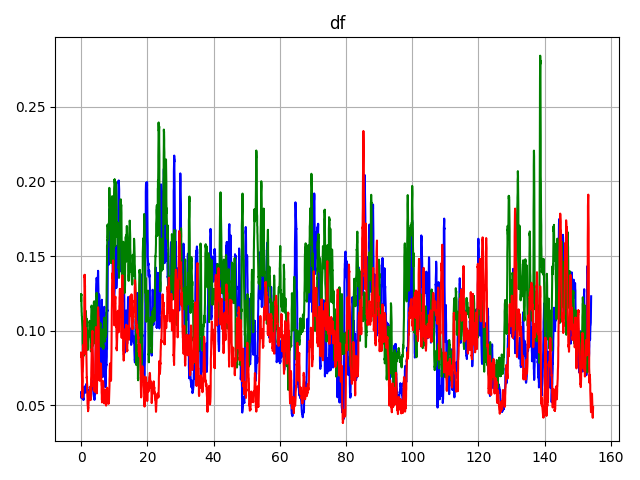

In [74]:
fig, ax = plt.subplots()
ax.plot(trial_rms_dflist[0]['Time'] - trial_rms_dflist[0]['Time'].iloc[0], trial_rms_dflist[0]['data']/mvc_max, color='blue')
ax.plot(trial_rms_dflist[1]['Time'] - trial_rms_dflist[1]['Time'].iloc[0], trial_rms_dflist[1]['data']/mvc_max, color='green')
ax.plot(trial_rms_dflist[2]['Time'] - trial_rms_dflist[2]['Time'].iloc[0], trial_rms_dflist[2]['data']/mvc_max, color='red')
ax.set_title('df')
ax.grid()
plt.tight_layout()

## Plot Data

### Plot State Information

#### Helper Functions for plotting state information

In [209]:
def draw_mass_background(start_time, Mass_Order, Mass_Trial, Trial_Length, Delay, axis, min, max):
    """
    state_Df: experiment start time
    Mass_Order: float/int list of mass (in order)
    Mass_Trial: int list with number of trials per mass. Must have same length as Mass_Order
    Trial_Length: float/int of length of trial
    Delay: int (for now) of delay between state and reference.
    axis: matplotlib axis to plot on
    min: min value of plot
    max: max value of plot
    """
    i = 0
    trial_start = 0
    trial_end = 0
    for mass in Mass_Order:
        if i == 0:
            trial_end = start_time + Mass_Trial[i]*Trial_Length + Delay
        else:
            trial_end = trial_start + Mass_Trial[i]*Trial_Length
        
        if mass == 0.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='green')
        elif mass == 1.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='yellow')
        elif mass == 2.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='red')
        trial_start = trial_end
        i = i + 1


In [210]:
def generic_plot(variable, axis, background, state_dataframe, ref_dataframe, meta_dataframe):
    variable = 'state.' + variable
    axis.plot('Time', variable, data= state_dataframe, color = 'red', linewidth = 1.0)
    if background:
        mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
        mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
        trial_length = meta_dataframe['trial_length'].iloc[0]
        delay = 1.0 # TODO: include delay into meta dataframe
        draw_mass_background(state_dataframe['Time'].iloc[0], mass_order, mass_trial, trial_length, delay, axis, state_dataframe[variable].min(), state_dataframe[variable].max())
    axis.set_xlim((state_dataframe['Time'].iloc[0], ref_dataframe['Time'].iloc[-1]))
    axis.set_ylim((state_dataframe[variable].min(), state_dataframe[variable].max()))

def plot_q(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot('Time', 'value.data', data=ref_dataframe, color='black', linewidth=1.0)
        axis.set_title('q vs reference')
    else:
        axis.set_title('q')
    generic_plot('q_state.q', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Angle (deg)')
    axis.grid()

def plot_qd(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], ref_dataframe['value.data']-55, color='k', linewidth = 0.8)
        axis.set_title('qd & reference')
    else:
        axis.set_title('qd')
    generic_plot('q_state.qd', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Velocity (deg/s)')
    axis.grid()

def plot_qdd(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], (ref_dataframe['value.data']-55)*3, color='k', linewidth = 0.8)
        axis.set_title('qdd & reference')
    else:
        axis.set_title('qdd')
    generic_plot('q_state.qdd', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Accel (deg/s^2)')
    axis.grid()

def plot_tau(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], (ref_dataframe['value.data']-55)/100, color='k', linewidth = 0.8)
        axis.set_title('Tau & Reference')
    else:
        axis.set_title('Tau')
    generic_plot('tau', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Torque ')
    axis.grid()

def plot_state(plot_list, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    """
    plot_list: string list of data to plot. q, qd, qdd and tau are possible
    background: boolean whether background should be colored based on mass
    reference: boolean whether to plot reference trajectory
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for plot in plot_list:
        if plot == 'q':
            plot_q(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'qd':
            plot_qd(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'qdd':
            plot_qdd(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'tau':
            plot_tau(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        i = i + 1
    return fig, axs

#### Plot Specified State for 1 trial

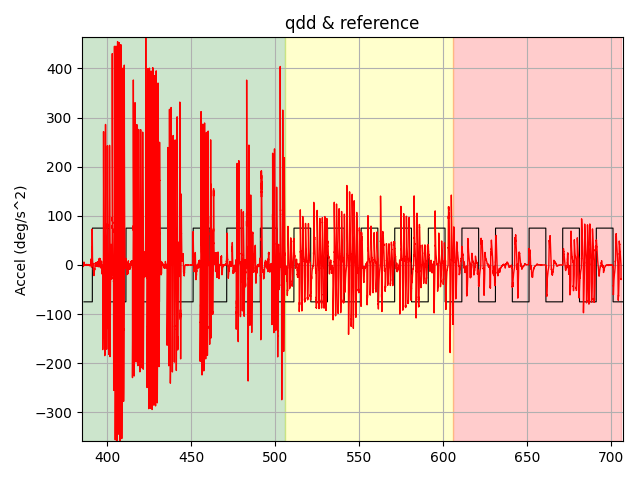

In [211]:
fig, ax = plt.subplots()
plot_qdd(ax, True, True, state_df_list[0], ref_df_list[0], meta_df_list[0])
plt.tight_layout()

#### Plot specified state for all trials

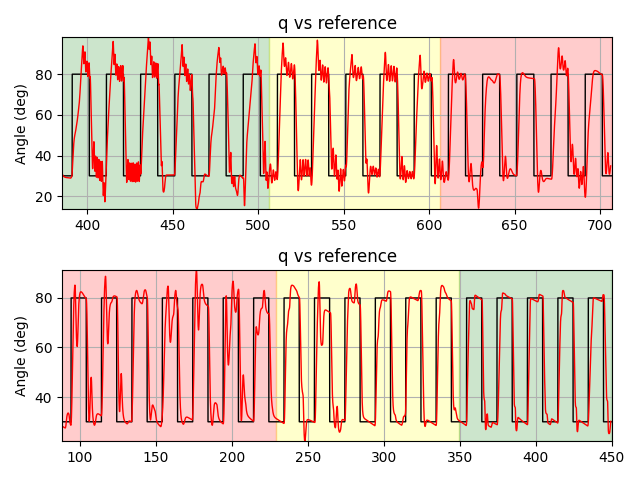

In [212]:
fig, axes = plt.subplots(len(state_df_list))
i = 0
for trial in state_df_list:
    plot_q(axes[i], True, True, trial, ref_df_list[i], meta_df_list[i])
    i = i + 1

plt.tight_layout()

#### Plot all States for 1 trial

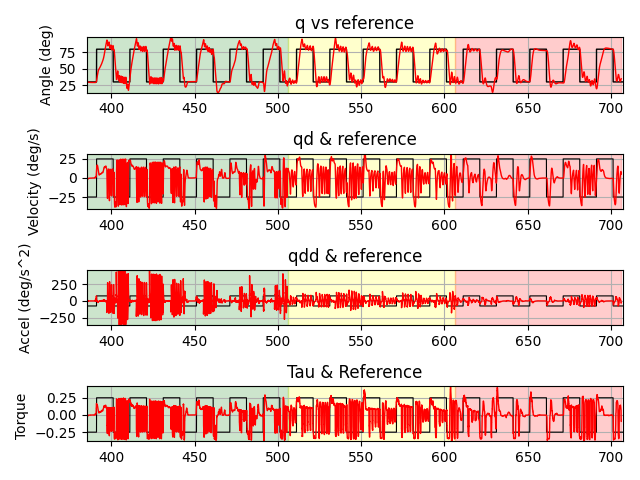

In [214]:
fig, axes = plot_state(['q', 'qd', 'qdd', 'tau'], True, True, state_df_list[0], ref_df_list[0], meta_df_list[0])
plt.tight_layout()

#### Plot state for all trials

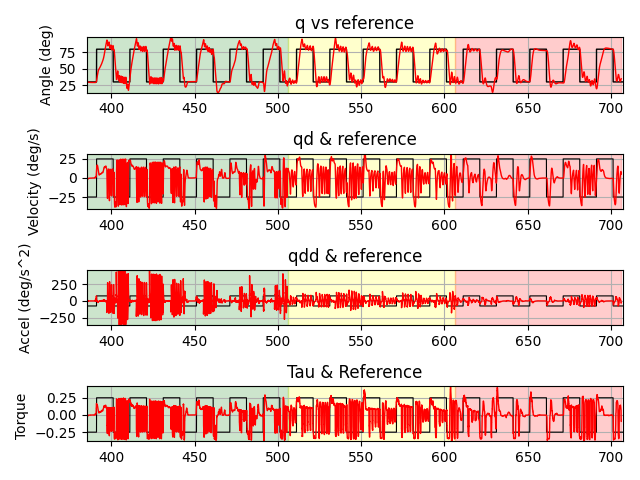

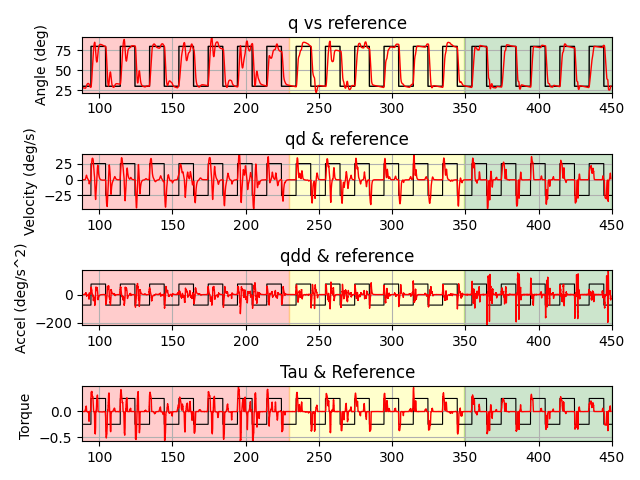

In [216]:
fig_list = []
axis_list = []
i = 0
for trial in state_df_list:
    fig, axes = plot_state(['q', 'qd', 'qdd', 'tau'], True, True, trial, ref_df_list[i], meta_df_list[i])
    fig_list.append(fig)
    axis_list.append(axes)
    i = i + 1
    plt.tight_layout()

### Plot Response Information

#### Helper Functions

In [217]:
def generic_response(response, axis, meta_dataframe, response_dataframe):
    axis.grid()
    axis.set_axisbelow(True)

    mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
    mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
    i = 0
    trial = 0
    for mass in mass_order:
        color = ''
        if mass == 0.0:
            color = 'green'
        elif mass == 1.0:
            color = 'orange'
        elif mass == 2.0:
            color = 'red'
        axis.bar(response_dataframe['header.seq'].iloc[trial:int(trial+mass_trial[i])]+1, response_dataframe[response].iloc[trial:int(trial+mass_trial[i])], color=color, alpha=0.7)
        trial = int(trial + mass_trial[i])
        i = i + 1
    
    trial_total = sum(mass_trial)
    axis.set_xlim((1 - 0.5, trial_total + 0.5))
    axis.set_xticks(np.arange(1, trial_total+1))

def plot_rising(axis, meta_dataframe, response_dataframe):
    generic_response('rise_t', axis, meta_dataframe, response_dataframe)
    axis.set_title('Rising Time (90%)')
    axis.set_ylabel('Time (s)')
    

def plot_overshoot(axis, meta_dataframe, response_dataframe):
    generic_response('overshoot', axis, meta_dataframe, response_dataframe)
    axis.set_title('Overshoot')
    axis.set_ylabel('Angle (deg)')

def plot_settling(axis):
    pass

def plot_ringing(axis):
    pass

def plot_response(plot_list, meta_dataframe, response_dataframe):
    """
    plot_list: string list 
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for response in plot_list:
        if response == 'rise_t':
            plot_rising(axs[i], meta_dataframe, response_dataframe)
        elif response == 'overshoot':
            plot_overshoot(axs[i], meta_dataframe, response_dataframe)
        elif response == 'settle_t':
            plot_settling(axs[i], meta_dataframe, response_dataframe)
        elif response == 'ringing':
            plot_ringing(axs[i], meta_dataframe, response_dataframe)
        i = i + 1
            
    return fig, axs

**Note to self (cause I am being dumb): with pandas, the last index is not included in an indexing range**